#Imports

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as pt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Loading the dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
rows, cols = 28, 28

In [ ]:
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
input_shape = (rows, cols, 1)

#Visualising the Dataset

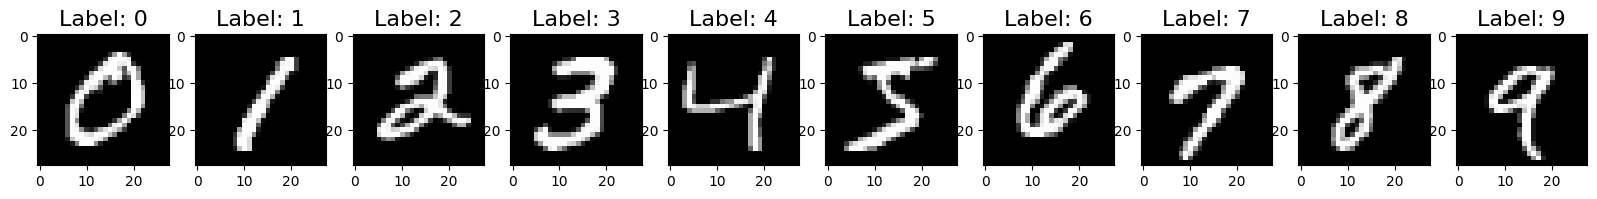

In [ ]:
num_classes = 10
f, ax = pt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

#Preprocessing the data

a). Normalization

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

b). One hot encoding

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Building the model

In [ ]:
model = tf.keras.Sequential()

def build_lenet(input_shape):

  #Convolution layer 1
  model.add(tf.keras.layers.Conv2D(filters = 6,
                                   kernel_size = (5,5),
                                   strides = (1,1),
                                   activation = 'tanh',
                                   input_shape = input_shape))
  
  #Subsampling layer 1
  model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                             strides = (2,2)))
  
  #Convolution layer 2
  model.add(tf.keras.layers.Conv2D(filters = 16,
                                   kernel_size = (5,5),
                                   strides = (1,1),
                                   activation = 'tanh'))
  
  #Subsampling layer 2
  model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                             strides = (2,2)))
  
  #Flattening layer
  model.add(tf.keras.layers.Flatten())

  #Fully connected layer 1
  model.add(tf.keras.layers.Dense(units = 120, activation = 'tanh'))

  #Flattening layer
  model.add(tf.keras.layers.Flatten())

  #Fully connected layer 2
  model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))

  #Output layer
  model.add(tf.keras.layers.Dense( units = 10, activation = 'softmax'))

  #Compile the model
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001), metrics = ['accuracy'])

  #Summarizing the model
  model.summary()

  return model

In [ ]:
lenet = build_lenet(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

#Training the model

In [ ]:
epochs = 50

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = 128,
                    verbose = 1)

Epoch 1/50
469/469 [==============================] - 30s 61ms/step - loss: 2.0024 - accuracy: 0.4570
Epoch 2/50
469/469 [==============================] - 26s 55ms/step - loss: 1.2734 - accuracy: 0.7218
Epoch 3/50
469/469 [==============================] - 26s 55ms/step - loss: 0.8759 - accuracy: 0.8027
Epoch 4/50
469/469 [==============================] - 26s 55ms/step - loss: 0.7021 - accuracy: 0.8341
Epoch 5/50
469/469 [==============================] - 27s 57ms/step - loss: 0.6080 - accuracy: 0.8494
Epoch 6/50
469/469 [==============================] - 26s 56ms/step - loss: 0.5480 - accuracy: 0.8601
Epoch 7/50
469/469 [==============================] - 26s 55ms/step - loss: 0.5057 - accuracy: 0.8684
Epoch 8/50
469/469 [==============================] - 26s 55ms/step - loss: 0.4740 - accuracy: 0.8749
Epoch 9/50
469/469 [==============================] - 25s 53ms/step - loss: 0.4492 - accuracy: 0.8798
Epoch 10/50
469/469 [==============================] - 25s 53ms/step - loss: 0.429

#Testing the model

In [ ]:
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY: ', acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.2236 - accuracy: 0.9350
ACCURACY:  0.9350000023841858


#One Example

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 2s 7ms/step
[[1.2841509e-04 2.1035443e-05 1.4095382e-04 ... 9.9774480e-01
  2.0054882e-05 1.0802493e-03]
 [7.9799630e-03 5.2066320e-03 9.3093246e-01 ... 1.6121818e-06
  1.1358217e-02 2.6716845e-05]
 [2.6372489e-05 9.9514693e-01 1.3621822e-03 ... 5.9325964e-04
  7.1888557e-04 1.7299237e-04]
 ...
 [1.3482252e-04 8.2521525e-05 7.5484393e-05 ... 4.0429039e-03
  8.9450656e-03 5.8668014e-02]
 [5.6622098e-03 1.8254354e-03 3.1903101e-04 ... 5.2646268e-05
  1.1236116e-01 1.4574899e-04]
 [2.8240778e-03 4.1825457e-05 5.5808434e-03 ... 2.6581556e-06
  4.8932410e-04 1.0065186e-04]]
[7 2 1 ... 4 5 6]


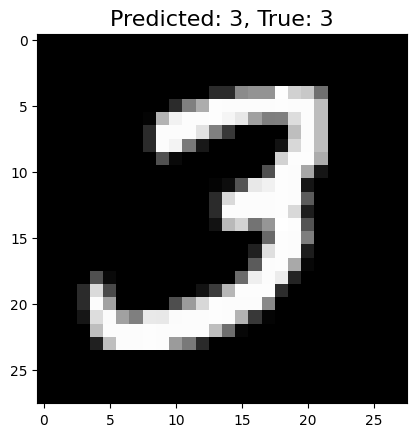

In [ ]:
# Visualize for one example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

pt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
pt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion Matrix

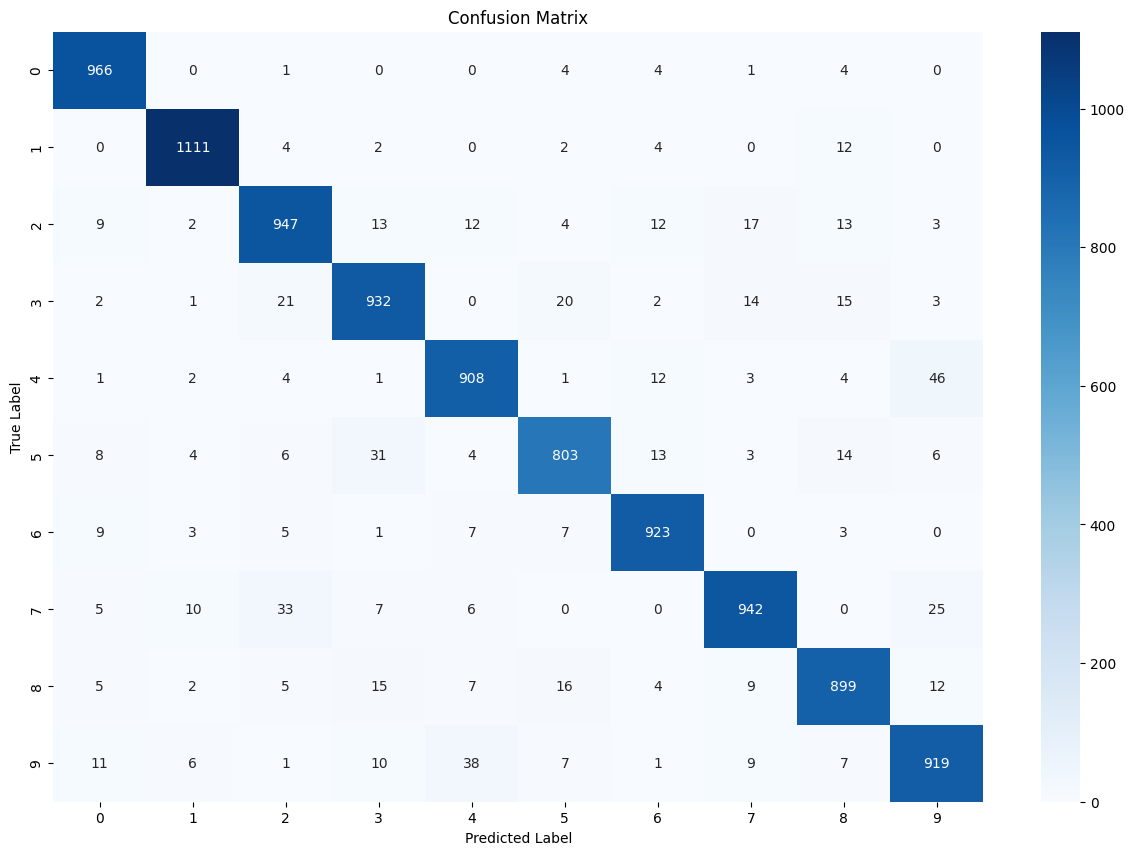

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = pt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#Tranformation/Reshaping into 28x28 pixel

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
print("Training Data ", x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print("Testing Data ", x_train.shape, y_train.shape)

Training Data  (60000, 28, 28) (60000, 10)
Testing Data  (60000, 28, 28) (60000, 10)
